## Data Collection

In [9]:
import pandas as pd

sales_data = pd.read_csv('/content/advertising (1).csv')

# Display the first few rows of the dataset
print(sales_data.head())

sales_data.isna()

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


No charts were generated by quickchart


## Exploratory Data Analysis (EDA)

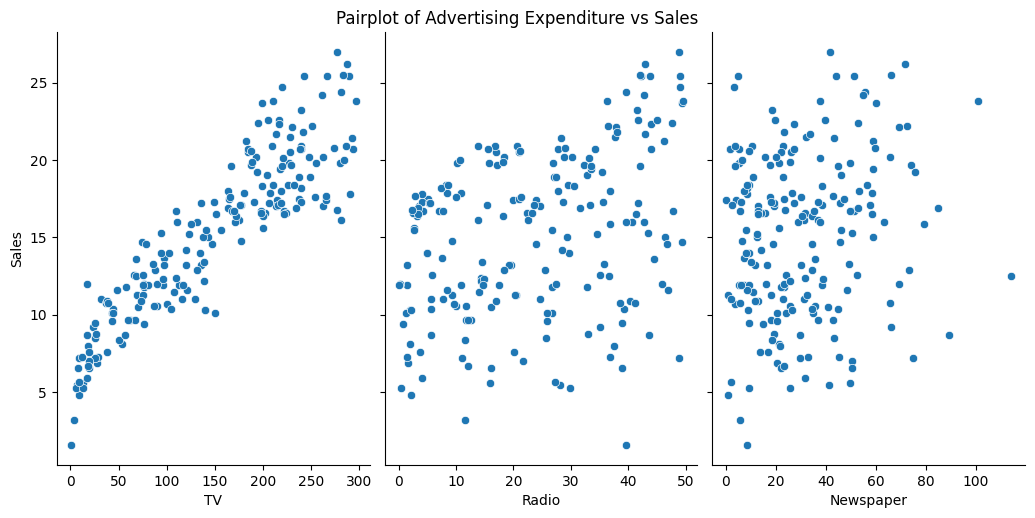

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize the relationship between features and target
sns.pairplot(sales_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7)
plt.suptitle('Pairplot of Advertising Expenditure vs Sales', y=1.02)
plt.show()

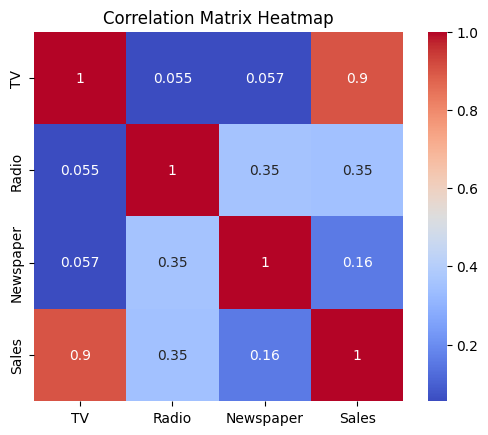

In [4]:
# Correlation matrix heatmap
corr = sales_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

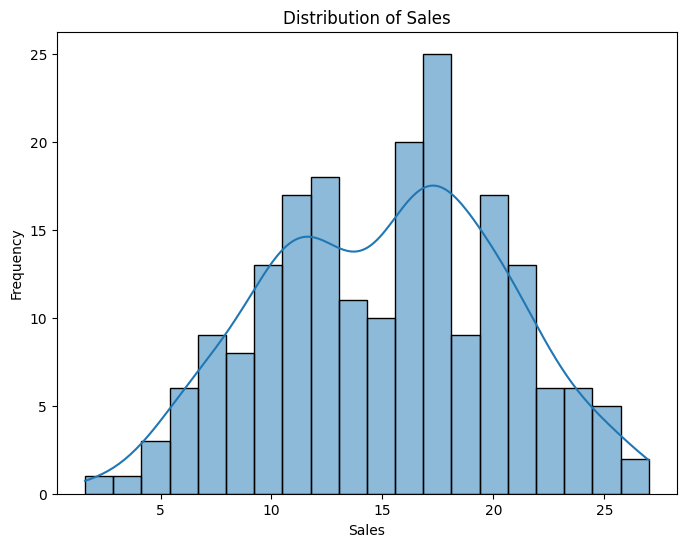

In [5]:
# Distribution of Sales
plt.figure(figsize=(8, 6))
sns.histplot(sales_data['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = sales_data[['TV', 'Radio', 'Newspaper']]
y = sales_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using DataFrame
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


## Model Building

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled_df, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled_df)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 2.9077569102710927
R^2 Score: 0.9059011844150825


## Prediction

In [8]:
# Predict sales for a new set of advertising expenditures
new_data = pd.DataFrame([[10, 10, 125]], columns=['TV', 'Radio', 'Newspaper'])  # TV, Radio, Newspaper
new_data_scaled = scaler.transform(new_data)
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=new_data.columns)
prediction = model.predict(new_data_scaled_df)
print("Predicted Sales:", prediction[0])

Predicted Sales: 6.810753587270151
